In [1]:
import pandas as pd

In [3]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
train_data = pd.read_excel(r"C:\Users\ACER\Desktop\flight_price_dataset/Data_Train.xlsx")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = train_data.copy()

In [15]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-31 05:50:00,2024-05-31 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [20]:
def extract_hour_min(df, col):
    df[col+ "_hour"] = df[col].dt.hour
    df[col+ "_minute"] = df[col].dt.minute
    return df.head(3)

In [21]:
extract_hour_min (data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-31 05:50:00,2024-05-31 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-31 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [22]:
extract_hour_min (data , 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-31 05:50:00,2024-05-31 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-31 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [23]:
cols_to_drop =["Arrival_Time" , "Dep_Time"]
data.drop(cols_to_drop , axis = 1 ,inplace = True)

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [26]:
data.shape

(10682, 16)

In [27]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"

In [28]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

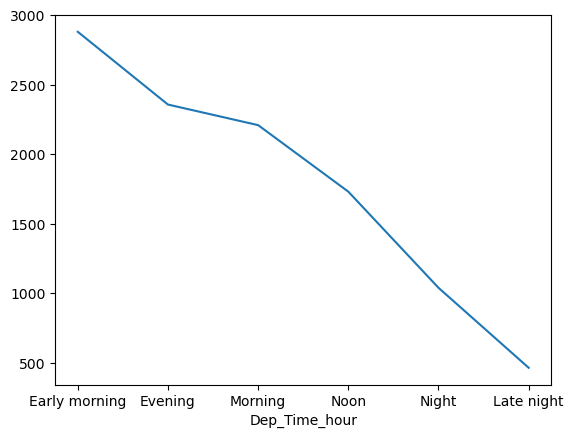

In [29]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot()

<Axes: xlabel='Dep_Time_hour'>

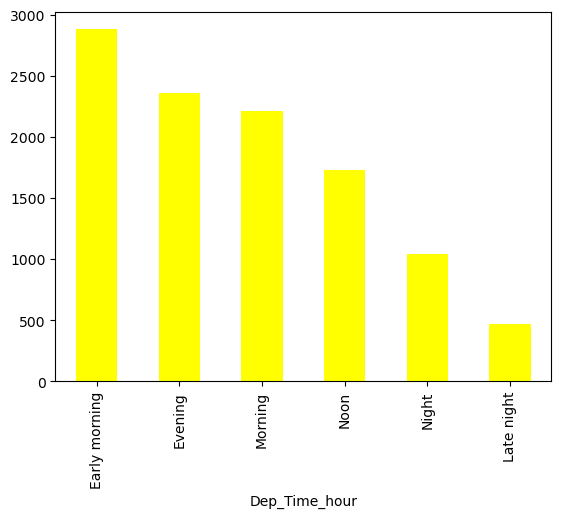

In [30]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar",color = "yellow")

In [31]:
import sys
print(sys.executable)

C:\Users\ACER\anaconda3\python.exe


In [34]:
!pip install plotly

In [36]:
!pip install cufflinks

In [37]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [38]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late night        465
Name: count, dtype: int64

In [39]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar", color= 'Orange')

In [40]:
def preprocess_duration(x):
    if 'h' not in x:
        x ='0h' + ' ' + x
    elif 'm' not in x:
       x = x + ' '+ '0m'
    return x

In [41]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [42]:
data['Duration'] [0]

'2h 50m'

In [43]:
'2h 50m' .split (' ')[0]

'2h'

In [44]:
int('2h 50m' .split (' ')[0][0:-1])

2

In [45]:
int('2h 50m' .split (' ')[1][0:-1])

50

In [46]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x .split (' ')[0][0:-1]))

In [47]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x .split (' ')[-1][0:-1]))

In [48]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19


In [49]:
eval('2*60')

120

In [50]:
data["Duration_total_mins"] =data['Duration'].str.replace('h',"*60").str.replace(' ', '+').str.replace('m',"*1").apply(eval)
data["Duration_total_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

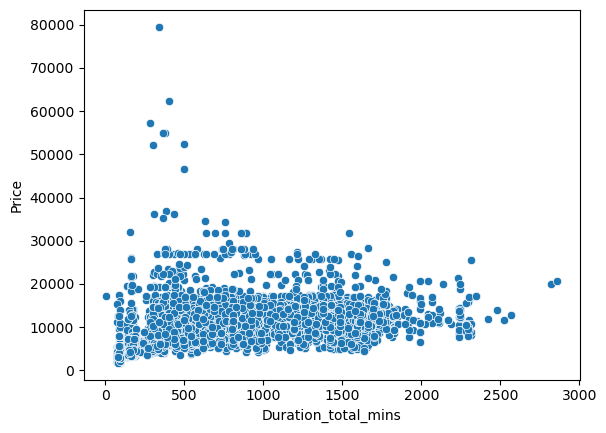

In [51]:
sns.scatterplot(x = "Duration_total_mins", y = "Price" , data= data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

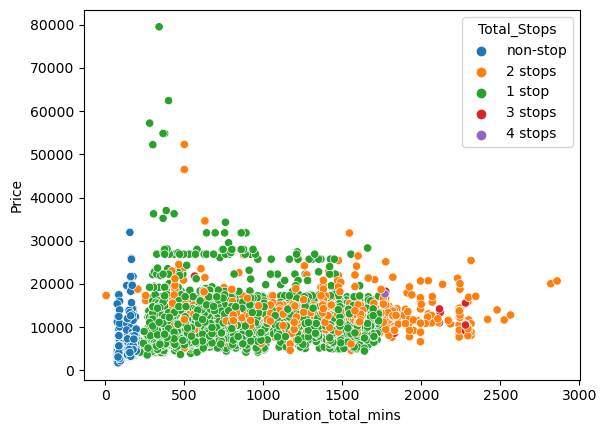

In [52]:
sns.scatterplot(x = "Duration_total_mins", y = "Price" , hue = "Total_Stops", data= data)

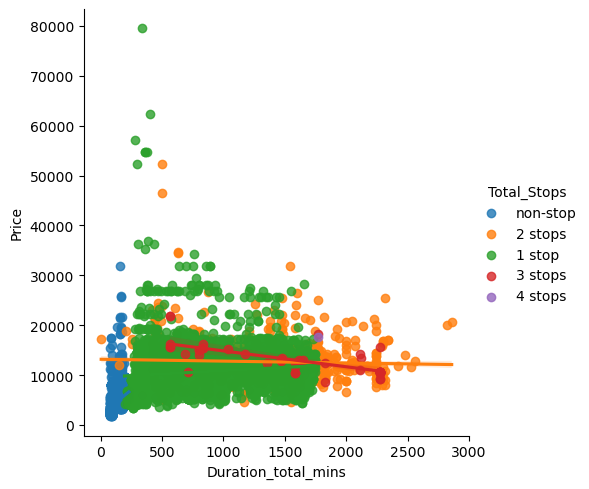

In [53]:
sns.lmplot(x = "Duration_total_mins", y = "Price" , hue = "Total_Stops", data= data)

In [54]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [55]:
data[data['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25,15,15,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,20,35,21,20,24,45,1485


In [56]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [57]:
data[data['Airline'] == 'IndiGo'].groupby('Route').size()

Route
BLR → AMD → DEL            3
BLR → BOM → DEL            4
BLR → DEL                483
BLR → GOI → DEL            1
BLR → HYD → DEL           18
BLR → IDR → DEL            5
BLR → LKO → DEL            3
BLR → MAA → DEL            1
BLR → NAG → DEL            3
BLR → STV → DEL            2
BOM → GOI → HYD            1
BOM → HYD                195
CCU → BBI → BLR           19
CCU → BLR                320
CCU → BOM → BLR            1
CCU → GAU → BLR            3
CCU → HYD → BLR           32
CCU → IXA → BLR            1
CCU → MAA → BLR           37
CCU → NAG → BLR            9
CCU → PAT → BLR           10
CCU → PNQ → BLR           11
CCU → RPR → HYD → BLR      1
CCU → VTZ → BLR            1
DEL → AMD → COK            3
DEL → BBI → COK            5
DEL → BLR → COK           57
DEL → BOM → COK          302
DEL → COK                 59
DEL → HYD → COK          196
DEL → HYD → MAA → COK     18
DEL → LKO → COK           17
DEL → MAA → COK           34
DEL → PNQ → COK           12
DEL → TR

In [58]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

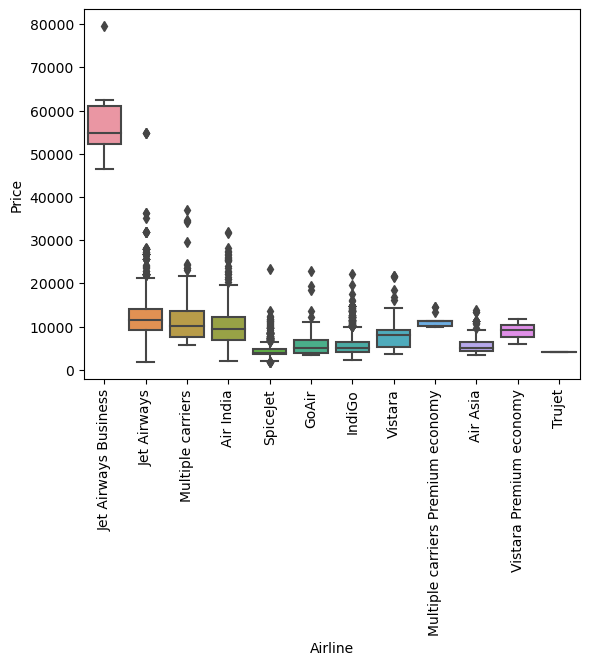

In [59]:
sns.boxplot(y='Price' , x= 'Airline' , data = data.sort_values('Price', ascending= False))
plt.xticks(rotation = "vertical")
plt.show()

In [60]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19,1140


In [61]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [62]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [63]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [64]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [65]:
data["Source"].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [66]:
for sub_category in data["Source"].unique():
    data['Source_' +sub_category ] = data["Source"].apply(lambda x : 1 if x == sub_category else 0)

In [67]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [68]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [69]:
data['Airline'].nunique()

12

In [70]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [71]:
airline= data.groupby(['Airline'])['Price'].mean().sort_values().index
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
{key: index for index , key in enumerate (airline, 0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [73]:
dict_airline = {key: index for index , key in enumerate (airline, 0)}

In [74]:
data['Airline'] = data['Airline'].map(dict_airline)

In [75]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [77]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [82]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [83]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [84]:
dest= data.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [85]:
dict_dest = {key: index for index , key in enumerate (dest, 0)}

In [86]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [87]:
data['Destination'] = data['Destination'].map(dict_dest)

In [88]:
data['Destination'] 

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [89]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0


In [90]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [91]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [92]:
stop = {'non-stop' : 0, '2 stops' :2, '1 stop' :1, '3 stops': 3, '4 stops' : 4}

In [93]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [94]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [95]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [96]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [97]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [98]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h,2,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [99]:
data.drop(columns= ['Additional_Info', 'Date_of_Journey', 'Duration_total_mins' , 'Source'], axis = 1 , inplace= True)

In [100]:
data['Journey_year'].unique()

array([2019])

In [101]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [102]:
data.head(2)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25,0,1,0,0,0


In [103]:
data.drop(columns= ['Route', 'Duration'], axis = 1, inplace = True)

In [104]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,2019,9,25,4,25,19,19,0,0,1,0,0
3,3,3,1,6218,12,5,2019,18,5,23,30,5,25,0,1,0,0,0


In [105]:
data.drop(columns= ['Journey_year'], axis = 1, inplace = True)

In [106]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,19,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0


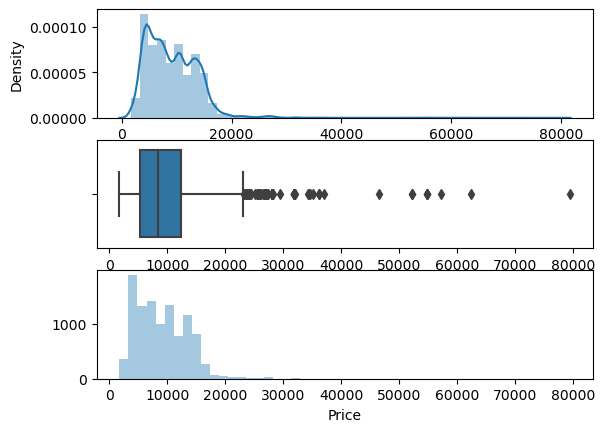

In [107]:
def plot(df, col):
    fig,(ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax =ax1)
    sns.boxplot( x = df[col] , ax=ax2)
    sns.distplot(df[col], ax =ax3, kde=False)
    
plot (data, 'Price')

In [108]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [109]:
print(maximum)

23017.0


In [110]:
print(minimum)

-5367.0


In [111]:
print ([price for price in data ['Price'] if price> maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [112]:
len([price for price in data ['Price'] if price> maximum or price < minimum])

94

In [113]:
np.where(data ['Price']>= 35000, data['Price'].median(), data ['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [114]:
data['Price'] = np.where(data ['Price']>= 35000, data['Price'].median(), data ['Price'])

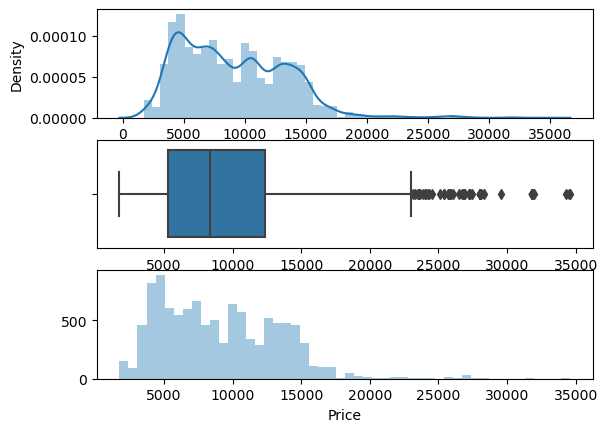

In [115]:
plot(data, 'Price')

In [116]:
X = data.drop(['Price'], axis =1)

In [117]:
y = data['Price']

In [118]:
from sklearn.feature_selection import mutual_info_regression

In [119]:
imp = mutual_info_regression(X , y)

In [120]:
imp

array([0.97704151, 0.99910247, 0.79481859, 0.24655562, 0.63274808,
       0.33729428, 0.26187087, 0.4004545 , 0.35082131, 0.47244148,
       0.36429815, 0.38858178, 0.45694731, 0.52762064, 0.12999054,
       0.20207139])

In [121]:
import pandas as pd
df = pd.DataFrame(data)

In [122]:
pd.DataFrame(imp)

,0
0,0.977042
1,0.999102
2,0.794819
3,0.246556
4,0.632748
5,0.337294
6,0.261871
7,0.400455
8,0.350821
9,0.472441


In [123]:
pd.DataFrame(imp, index= X.columns)

,0
Airline,0.977042
Destination,0.999102
Total_Stops,0.794819
Journey_day,0.246556
Journey_month,0.632748
Dep_Time_hour,0.337294
Dep_Time_minute,0.261871
Arrival_Time_hour,0.400455
Arrival_Time_minute,0.350821
Duration_hours,0.472441


In [124]:
imp_df = pd.DataFrame(imp, index= X.columns)
imp_df

,0
Airline,0.977042
Destination,0.999102
Total_Stops,0.794819
Journey_day,0.246556
Journey_month,0.632748
Dep_Time_hour,0.337294
Dep_Time_minute,0.261871
Arrival_Time_hour,0.400455
Arrival_Time_minute,0.350821
Duration_hours,0.472441


In [125]:
imp_df.columns= ['importance']
imp_df

,importance
Airline,0.977042
Destination,0.999102
Total_Stops,0.794819
Journey_day,0.246556
Journey_month,0.632748
Dep_Time_hour,0.337294
Dep_Time_minute,0.261871
Arrival_Time_hour,0.400455
Arrival_Time_minute,0.350821
Duration_hours,0.472441


In [126]:
imp_df.sort_values(by='importance', ascending = False)

,importance
Destination,0.999102
Airline,0.977042
Total_Stops,0.794819
Journey_month,0.632748
Source_Delhi,0.527621
Duration_hours,0.472441
Source_Kolkata,0.456947
Arrival_Time_hour,0.400455
Source_Banglore,0.388582
Duration_mins,0.364298


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
ml_model = RandomForestRegressor ()

In [131]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [132]:
y_pred = ml_model.predict(X_test)

In [133]:
y_pred

array([16726.72 ,  5335.19 ,  8833.73 , ...,  3575.2  ,  6334.958,
        6832.5  ])

In [134]:
from sklearn import metrics

In [135]:
metrics.r2_score(y_test, y_pred)

0.8122574576806513

In [136]:
import pickle

In [137]:
file = open(r'C:\Users\ACER\Desktop\flight_price_dataset/rf_randompki', 'wb')

In [138]:
pickle.dump(ml_model, file)

In [139]:
model = open(r'C:\Users\ACER\Desktop\flight_price_dataset/rf_randompki', 'rb')

In [140]:
forest = pickle.load(model)

In [141]:
y_pred2 =forest.predict(X_test)

In [142]:
metrics.r2_score(y_test, y_pred2)

0.8122574576806513

In [147]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np. mean(np.abs( y_true - y_pred ) /y_true) * 100

In [148]:
mape(y_test, y_pred)

13.213069863259708

In [149]:
from sklearn import metrics

In [150]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Trainning score: {}'.format(model.score(X_train, y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score= metrics.r2_score(y_test, y_predection)
    print('r2_score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('MAPE : {}'.format(mape(y_test, y_predection)))
    sns.distplot(y_test - y_predection)
    

Trainning score: 0.9512688722230963
predictions are : [16838.67  5386.96  8729.28 ...  3460.45  6313.58  6856.56]


r2_score : 0.8111816967127204
MAE : 1180.0877554694673
MSE : 3675839.13790253
RMSE : 1917.24780294633
MAPE : 13.20722635970745


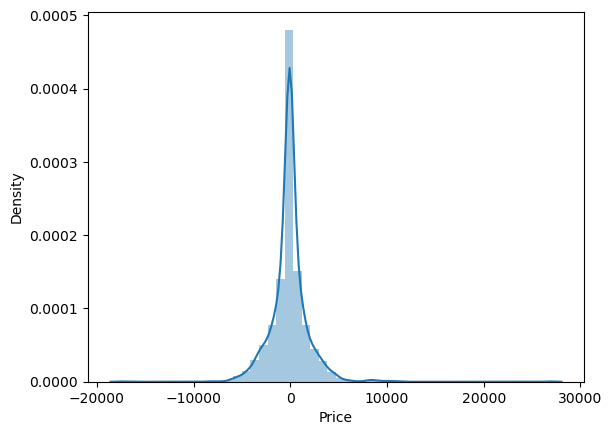

In [151]:
predict(RandomForestRegressor())

In [152]:
from sklearn.tree import DecisionTreeRegressor

Trainning score: 0.966591628243878
predictions are : [16840.  4959.  9397. ...  3419.  5797.  6442.]


r2_score : 0.6825617751289754
MAE : 1405.2135904155748
MSE : 6179760.280293897
RMSE : 2485.9123637598123
MAPE : 15.501079568183835


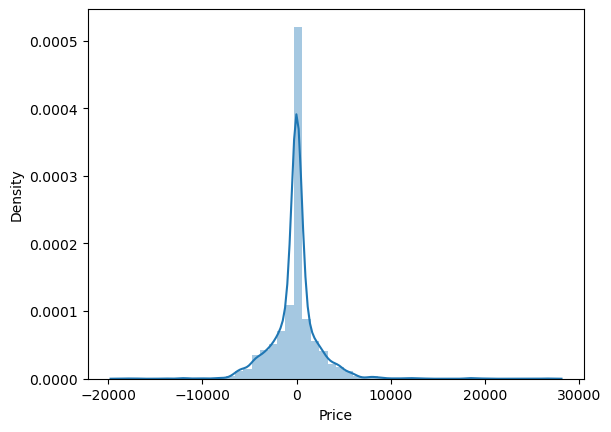

In [153]:
predict(DecisionTreeRegressor())

In [154]:
RandomForestRegressor()

RandomForestRegressor()

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [156]:
reg_rf = RandomForestRegressor()

In [157]:
np.linspace(start= 100 , stop =1200, num= 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [158]:
n_estimators = [int(x) for x in np.linspace(start= 100 , stop =1200, num= 6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start= 5 , stop =30, num= 4)]
min_samples_split = [5,10,15,100]
                                         

In [159]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [160]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [162]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions= random_grid, cv=3, n_jobs= -1 , verbose = 2)

In [163]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [164]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [165]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=5,
                      n_estimators=540)

In [166]:
rf_random.best_score_

0.8060727610007935